## SMIB

Synchronous Machine Infinite Bus (SMIB) system


### System analysis and simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pydae.ssa as ssa
from IPython.core.display import HTML,SVG
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

#### Initialization

In [2]:
import smib
import smib_avr

In [3]:
model = smib_avr.model()

model.ini({'p_m_1':0.5,'v_f_1':2, "K_delta_2":0.0000001},'xy_0.json')

Input or parameter v_f_1 not found.
Input or parameter K_delta_2 not found.


True

In [4]:
model.report_x()
model.report_y()

delta_1 =  0.74
omega_1 =  1.00
e1q_1 =  0.87
e1d_1 =  0.43
x_ab_1 =  0.00
x_e_1 =  0.36
xi_v_1 = 3633.52
delta_3 =  0.00
Domega_3 =  0.00
Dv_3  = -0.00
xi_freq =  0.00
V_1   =  1.00
theta_1 =  0.05
V_2   =  1.00
theta_2 =  0.00
V_3   =  1.00
theta_3 =  0.00
i_d_1 =  0.33
i_q_1 =  0.38
p_g_1 =  0.50
q_g_1 =  0.01
v_f_1 =  1.36
omega_3 =  1.00
i_d_3 =  0.00
i_q_3 = -0.05
p_s_3 = -0.05
q_s_3 =  0.00
omega_coi =  1.00
p_agc =  0.00


#### Small signal analysis

In [5]:
ssa.A_eval(model)
damp = ssa.damp_report(model)
damp.sort_values('Damp').round(2)

,Real,Imag,Freq.,Damp
Mode 3,-0.84,7.58,1.21,0.11
Mode 4,-0.84,-7.58,1.21,0.11
Mode 5,-6.95,2.44,0.39,0.94
Mode 6,-6.95,-2.44,0.39,0.94
Mode 1,-1.00,0.00,0.00,1.00
Mode 2,-0.01,0.00,0.00,1.00
Mode 7,-1.88,0.00,0.00,1.00
Mode 8,-0.00,0.00,0.00,1.00
Mode 9,-0.00,0.00,0.00,1.00
Mode 10,-0.00,0.00,0.00,1.00


#### Time domain simulation

Input or parameter v_f_1 not found.


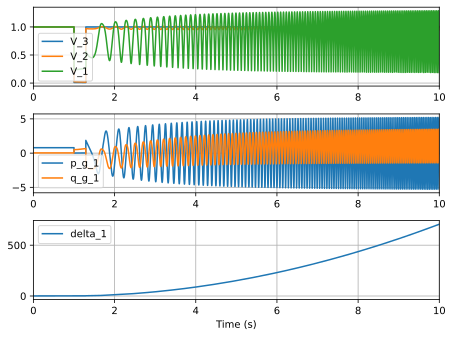

In [23]:
model = smib_avr.model()
model.Dt = 0.001
model.decimation = 1



model.ini({'p_m_1':0.8, "D_1":0.0, 'v_f_1':2.5},'xy_0.json')
model.run( 1.0,{})



model.run( 1.29,{'v_ref_3':0.01})


it = model.it
t_pre = model.t
t = model.t
for v in np.linspace(0.01,1.0,100):
    t += model.Dt    
    model.step(t,{'v_ref_3':v})
model.t = t_pre

model.run(10,{'v_ref_3':1.0})
model.post();

fig,axes = plt.subplots(nrows=3)

axes[0].plot(model.Time,  model.get_values('V_3'),label='V_3')
axes[0].plot(model.Time,  model.get_values('V_2'),label='V_2')
axes[0].plot(model.Time,  model.get_values('V_1'),label='V_1')

axes[1].plot(model.Time,  model.get_values('p_g_1'),label='p_g_1')
axes[1].plot(model.Time,  model.get_values('q_g_1'),label='q_g_1')

#axes[2].plot(model.Time,  model.get_values('omega_1'),label='omega_1')
axes[2].plot(model.Time,  model.get_values('delta_1'),label='delta_1')

for ax in axes:
    ax.legend()
    ax.grid()
    ax.set_xlim([0,10])
ax.set_xlabel('Time (s)')
fig.tight_layout()


-0.007866964320314017 -0.006188784528445108
0.06679503147310303 0.09377941153769198
0.14182711502177878 0.19366695191423808
0.21769596134369051 0.29347191430020547
0.2949154350939179 0.3931907377631705
0.37408160602935925 0.49281786450194526
0.45592304230300235 0.5923451115094024
0.541380050233399 0.6917605843363012
0.6317409799769709 0.7910467324847937
0.7289005634006189 0.890176614143447


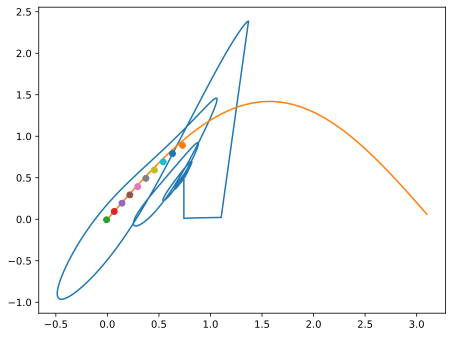

In [11]:
fig,axes = plt.subplots(nrows=1)

axes.plot(model.get_values('delta_1'),  model.get_values('p_g_1'),label='p_g_1')

model = smib.model()

deltas = np.arange(0,np.pi,0.1)
pows = 1.42*np.sin(deltas)
axes.plot(deltas, pows,label='p_g_1')

for p_m in np.arange(0,1.0,0.1):
    model.ini({'p_m_1':p_m, "D_1":0.0, 'v_f_1':2.5},'xy_0.json')
    print( model.get_value('delta_1'), model.get_value('p_g_1'))
    axes.plot(model.get_value('delta_1'),  model.get_value('p_g_1'),'o')


ax.legend()
ax.grid()
ax.set_xlim([0,10])
ax.set_xlabel('Time (s)')
fig.tight_layout()

In [68]:
2.5/1.75

1.4285714285714286

In [73]:
model.report_params()


S_base =100000000.00
g_1_2 = 3.85
b_1_2 =-19.23
bs_1_2 =-0.00
U_1_n =20000.00
U_2_n =20000.00
S_n_1 =100000000.00
Omega_b_1 =314.16
H_1   = 5.00
T1d0_1 = 8.00
T1q0_1 = 0.40
X_d_1 = 1.80
X_q_1 = 1.70
X1d_1 = 0.30
X1q_1 = 0.55
D_1   = 0.00
R_a_1 = 0.01
K_delta_1 = 0.00
K_sec_1 = 0.00
S_n_2 =1000000000.00
F_n_2 =50.00
X_v_2 = 0.00
R_v_2 = 0.00
K_delta_2 = 0.00
K_alpha_2 = 0.00
K_rocov_2 = 0.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.01
